In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('../datasets/50_Startups.csv')

In [4]:
!pip install statsmodels

^C


In [12]:
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ModuleNotFoundError: No module named 'statsmodels'

### preprocessing

In [ ]:
state_enc = OneHotEncoder(drop='first')
state_df  = pd.DataFrame(state_enc.fit_transform(df[['State']]).toarray(),columns=['state_1','state_2'])
df = pd.concat([state_df,df],axis=1)
df.drop(['State'],inplace=True,axis=1)

In [ ]:
X = df[['state_1', 'state_2', 'R&D Spend', 'Administration', 'Marketing Spend',]]
y = df['Profit']
scalerX = StandardScaler()
x = scalerX.fit_transform(X)
print(x[:10]) # first 10 rows

In [ ]:
X

In [ ]:
df['constant'] = 1 # ols algo does not 

In [ ]:
# re aranged
df = df[['constant','state_1', 'state_2', 'R&D Spend', 'Administration', 'Marketing Spend','Profit']]
x = df[['constant','state_1', 'state_2', 'R&D Spend', 'Administration', 'Marketing Spend']]

In [ ]:
model = OLS(y , x.iloc[:,[0,1,2,3,4,5]]).fit()
model.summary()

### conclusion
only R&D & marketing money seem to be responsible for startup profit prediction

### now we can create a simple & better model

In [48]:
from sklearn.linear_model import LinearRegression

In [51]:
x = df[['R&D Spend','Marketing Spend']]
y = df['Profit']
x = scalerX.fit_transform(x)

In [52]:
model = LinearRegression()
model.fit(x,y)
yhat = model.predict(x)
df['prediction'] = yhat

In [55]:
model.score(x,y)

0.9504503015559763

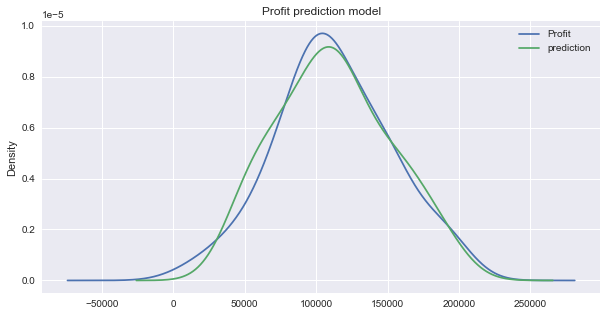

In [56]:
df[['Profit','prediction']].plot(kind='kde',figsize=(10,5),title='Profit prediction model')
plt.show()